In [1]:
from scipy import integrate

import pandas as pd
import numpy as np
import os
import pickle as pkl
import h5py
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [65]:
def calculateHourlyUsage(data):
    cols = ['hour','no_of_jobs','machines', 'mean_cpu_usage']
    result = pd.DataFrame(columns=cols)
    print("started loading")
    for i in tqdm(range(30 * 24 )):
        range_min = i * 3600 * (10**6) # 扩大数据量，以6分钟为一个粒度？
        range_max = (i + 1) * 3600 * (10**6)
        jobs_of_hour = data[(data['end_time'] >= range_min) & (data['end_time'] < range_max)]
        no_of_jobs = len(jobs_of_hour['job_id'].unique())
        avg_cpu = np.average(jobs_of_hour['mean_cpu_usage'])
        machines = len(jobs_of_hour['machine_id'].unique())
        output_data = pd.DataFrame(columns=cols,data=[[i,no_of_jobs,machines, avg_cpu]])
        result = result.append(output_data)
    return result
def hour_to_day(hour_input):
    start_date = datetime.datetime(2011, 5, 1, 19, 0)
    datee = start_date + timedelta(microseconds = hour_input)
    print (datee)
    return datee.day - start_date.day

hour_to_day(50758000000)


2011-05-02 09:05:58


1

In [3]:
#usage_dir = "F:\\google-cluster2011\\task_usage\\"
#data_dir = "./data/task_usage/"
data_dir = "F:\\google-cluster2011\\task_usage\\"

task_usage_header = ['start_time','end_time','job_id','task_index','machine_id', 'mean_cpu_usage',
                     'canon_memory_usage', 'assign_memory_usage', 'unmapped_cache', 'total_cache', 
                     'max_mem', 'mean_io', 'mean_space', 'max_cpu', 'max_io', 'cpi', 'mai', 'sample',
                     'agg_type', 'sample_cpu_usage']

In [4]:
output_dataframe = pd.DataFrame()
for i in tqdm(range(100)): #0~59
    file_str = str(i).zfill(5) 
    print (file_str)
    df = pd.read_csv(data_dir+"part-"+file_str+"-of-00500.csv.gz",header=None)
    df.columns = task_usage_header
    #保留 'end_time','job_id','task_index','machine_id', 'mean_cpu_usage' 这些列
    df.drop(df.columns[[0,6,7,8,9,10,11,12,13,14,15,16,17,18,19]], axis=1,inplace=True)

    output_dataframe = output_dataframe.append(df)
#     output_data_dir = "./data/task_usage_input_timeseries/part-"+file_str+"-of-00500.csv"
#     df.to_csv(output_data_dir, sep='\t')
#     break

  0%|          | 0/100 [00:00<?, ?it/s]

00000


  1%|          | 1/100 [00:07<12:11,  7.39s/it]

00001


  2%|▏         | 2/100 [00:14<12:02,  7.38s/it]

00002


  3%|▎         | 3/100 [00:21<11:47,  7.29s/it]

00003


  4%|▍         | 4/100 [00:28<11:27,  7.16s/it]

00004


  5%|▌         | 5/100 [00:36<11:46,  7.43s/it]

00005


  6%|▌         | 6/100 [00:44<11:53,  7.59s/it]

00006


  7%|▋         | 7/100 [00:52<11:40,  7.53s/it]

00007


  8%|▊         | 8/100 [00:59<11:37,  7.58s/it]

00008


  9%|▉         | 9/100 [01:07<11:23,  7.51s/it]

00009


 10%|█         | 10/100 [01:15<11:25,  7.62s/it]

00010


 11%|█         | 11/100 [01:22<11:09,  7.52s/it]

00011


 12%|█▏        | 12/100 [01:30<11:11,  7.63s/it]

00012


 13%|█▎        | 13/100 [01:37<11:02,  7.62s/it]

00013


 14%|█▍        | 14/100 [01:45<10:44,  7.50s/it]

00014


 15%|█▌        | 15/100 [01:53<11:06,  7.84s/it]

00015


 16%|█▌        | 16/100 [02:01<11:07,  7.95s/it]

00016


 17%|█▋        | 17/100 [02:09<10:58,  7.93s/it]

00017


 18%|█▊        | 18/100 [02:18<11:07,  8.14s/it]

00018


 19%|█▉        | 19/100 [02:28<11:48,  8.74s/it]

00019


 20%|██        | 20/100 [02:41<13:26, 10.08s/it]

00020


 21%|██        | 21/100 [02:56<15:11, 11.54s/it]

00021


 22%|██▏       | 22/100 [03:12<16:31, 12.72s/it]

00022


 23%|██▎       | 23/100 [03:24<16:05, 12.53s/it]

00023


 24%|██▍       | 24/100 [03:32<14:05, 11.12s/it]

00024


 25%|██▌       | 25/100 [03:40<12:52, 10.30s/it]

00025


 26%|██▌       | 26/100 [03:48<11:57,  9.70s/it]

00026


 27%|██▋       | 27/100 [03:57<11:32,  9.48s/it]

00027


 28%|██▊       | 28/100 [04:06<11:01,  9.18s/it]

00028


 29%|██▉       | 29/100 [04:14<10:38,  9.00s/it]

00029


 30%|███       | 30/100 [04:23<10:25,  8.93s/it]

00030


 31%|███       | 31/100 [04:32<10:17,  8.95s/it]

00031


 32%|███▏      | 32/100 [04:40<09:56,  8.77s/it]

00032


 33%|███▎      | 33/100 [04:49<09:43,  8.72s/it]

00033


 34%|███▍      | 34/100 [04:57<09:28,  8.61s/it]

00034


 35%|███▌      | 35/100 [05:07<09:46,  9.03s/it]

00035


 36%|███▌      | 36/100 [05:17<09:57,  9.34s/it]

00036


 37%|███▋      | 37/100 [05:27<09:59,  9.51s/it]

00037


 38%|███▊      | 38/100 [05:37<09:55,  9.61s/it]

00038


 39%|███▉      | 39/100 [05:47<09:45,  9.61s/it]

00039


 40%|████      | 40/100 [05:57<09:46,  9.78s/it]

00040


 41%|████      | 41/100 [06:06<09:21,  9.52s/it]

00041


 42%|████▏     | 42/100 [06:15<08:59,  9.29s/it]

00042


 43%|████▎     | 43/100 [06:24<08:43,  9.19s/it]

00043


 44%|████▍     | 44/100 [06:32<08:28,  9.08s/it]

00044


 45%|████▌     | 45/100 [06:42<08:22,  9.13s/it]

00045


 46%|████▌     | 46/100 [06:50<08:05,  8.99s/it]

00046


 47%|████▋     | 47/100 [06:58<07:40,  8.69s/it]

00047


 48%|████▊     | 48/100 [07:06<07:23,  8.53s/it]

00048


 49%|████▉     | 49/100 [07:16<07:33,  8.88s/it]

00049


 50%|█████     | 50/100 [07:27<07:46,  9.34s/it]

00050


 51%|█████     | 51/100 [07:36<07:35,  9.30s/it]

00051


 52%|█████▏    | 52/100 [07:45<07:31,  9.41s/it]

00052


 53%|█████▎    | 53/100 [07:55<07:20,  9.37s/it]

00053


 54%|█████▍    | 54/100 [08:05<07:20,  9.58s/it]

00054


 55%|█████▌    | 55/100 [08:14<07:00,  9.35s/it]

00055


 56%|█████▌    | 56/100 [08:23<06:48,  9.28s/it]

00056


 57%|█████▋    | 57/100 [08:31<06:30,  9.07s/it]

00057


 58%|█████▊    | 58/100 [08:51<08:41, 12.41s/it]

00058


 59%|█████▉    | 59/100 [09:14<10:33, 15.46s/it]

00059


 60%|██████    | 60/100 [09:40<12:24, 18.62s/it]

00060


 61%|██████    | 61/100 [09:55<11:25, 17.58s/it]

00061


 62%|██████▏   | 62/100 [10:11<10:50, 17.12s/it]

00062


 63%|██████▎   | 63/100 [10:26<10:07, 16.41s/it]

00063


 64%|██████▍   | 64/100 [10:37<08:57, 14.92s/it]

00064


 65%|██████▌   | 65/100 [10:55<09:10, 15.74s/it]

00065


 66%|██████▌   | 66/100 [11:06<08:10, 14.44s/it]

00066


 67%|██████▋   | 67/100 [11:16<07:09, 13.02s/it]

00067


 68%|██████▊   | 68/100 [11:25<06:16, 11.78s/it]

00068


 69%|██████▉   | 69/100 [11:35<05:49, 11.27s/it]

00069


 70%|███████   | 70/100 [11:45<05:24, 10.80s/it]

00070


 71%|███████   | 71/100 [11:54<05:01, 10.39s/it]

00071


 72%|███████▏  | 72/100 [12:05<04:57, 10.61s/it]

00072


 73%|███████▎  | 73/100 [12:22<05:35, 12.41s/it]

00073


 74%|███████▍  | 74/100 [12:34<05:21, 12.35s/it]

00074


 75%|███████▌  | 75/100 [12:49<05:26, 13.06s/it]

00075


 76%|███████▌  | 76/100 [12:59<04:55, 12.29s/it]

00076


 77%|███████▋  | 77/100 [13:09<04:22, 11.41s/it]

00077


 78%|███████▊  | 78/100 [13:20<04:08, 11.29s/it]

00078


 79%|███████▉  | 79/100 [13:37<04:32, 12.96s/it]

00079


 80%|████████  | 80/100 [13:56<04:55, 14.78s/it]

00080


 81%|████████  | 81/100 [14:07<04:21, 13.76s/it]

00081


 82%|████████▏ | 82/100 [14:20<04:01, 13.40s/it]

00082


 83%|████████▎ | 83/100 [14:35<03:58, 14.06s/it]

00083


 84%|████████▍ | 84/100 [14:53<04:00, 15.04s/it]

00084


 85%|████████▌ | 85/100 [15:11<03:59, 15.99s/it]

00085


 86%|████████▌ | 86/100 [15:30<03:58, 17.01s/it]

00086


 87%|████████▋ | 87/100 [15:41<03:17, 15.18s/it]

00087


 88%|████████▊ | 88/100 [15:50<02:39, 13.33s/it]

00088


 89%|████████▉ | 89/100 [16:01<02:17, 12.46s/it]

00089


 90%|█████████ | 90/100 [16:11<01:57, 11.76s/it]

00090


 91%|█████████ | 91/100 [16:37<02:24, 16.04s/it]

00091


 92%|█████████▏| 92/100 [16:54<02:12, 16.53s/it]

00092


 93%|█████████▎| 93/100 [17:08<01:48, 15.57s/it]

00093


 94%|█████████▍| 94/100 [17:21<01:28, 14.74s/it]

00094


 95%|█████████▌| 95/100 [17:33<01:10, 14.01s/it]

00095


 96%|█████████▌| 96/100 [17:48<00:56, 14.24s/it]

00096


 97%|█████████▋| 97/100 [18:02<00:42, 14.31s/it]

00097


 98%|█████████▊| 98/100 [18:18<00:29, 14.86s/it]

00098


 99%|█████████▉| 99/100 [18:29<00:13, 13.64s/it]

00099


100%|██████████| 100/100 [18:40<00:00, 11.20s/it]


In [70]:
output_dataframe_final = output_dataframe

In [6]:
output_dataframe_final

,end_time,job_id,task_index,machine_id,mean_cpu_usage
0,900000000,3418309,0,4155527081,0.001562
1,900000000,3418309,1,329150663,0.001568
2,900000000,3418314,0,3938719206,0.000307
3,900000000,3418314,1,351618647,0.000300
4,900000000,3418319,0,431052910,0.000461
...,...,...,...,...,...
2017011,501720000000,6300419086,75,257338306,0.000000
2017012,501720000000,6300419086,98,334006408,0.000000
2017013,501900000000,6300422961,15,4820109218,0.009384
2017014,501900000000,6300424786,197,4303328869,0.039370


In [7]:
output_dataframe_final = calculateHourlyUsage(output_dataframe_final)

started loading


 19%|█▉        | 140/720 [02:44<10:30,  1.09s/it]C:\Users\lenovo\anaconda3\envs\google-trace-analysis\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\lenovo\anaconda3\envs\google-trace-analysis\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 720/720 [11:55<00:00,  1.01it/s]


In [67]:
output_dataframe_final = output_dataframe_final[output_dataframe_final['hour']<84]

In [69]:
output_dataframe_final

,hour,no_of_jobs,machines,mean_cpu_usage
0,0,4513,12476,0.017537
0,1,4688,12476,0.016717
0,2,4620,12478,0.016284
0,3,4855,12485,0.015711
0,4,4719,12485,0.014981
...,...,...,...,...
0,79,4932,12513,0.018563
0,80,4770,12513,0.020215
0,81,5115,12516,0.018894
0,82,4736,12515,0.018735


In [10]:
X = np.array(output_dataframe_final['mean_cpu_usage'].tolist())

In [11]:
X

array([0.01753654, 0.01671724, 0.01628377, 0.01571072, 0.01498057,
       0.01495185, 0.01394167, 0.01502232, 0.01649895, 0.01657997,
       0.01664338, 0.01745756, 0.01696358, 0.0181543 , 0.01921209,
       0.0185627 , 0.0188185 , 0.01891544, 0.02145261, 0.02142198,
       0.01988755, 0.02009669, 0.02083384, 0.01824115, 0.01937279,
       0.01865439, 0.01282313, 0.00946815, 0.00866318, 0.00976388,
       0.00873009, 0.01345372, 0.01627282, 0.01631837, 0.01653781,
       0.01640791, 0.01659396, 0.01794766, 0.01857603, 0.01922389,
       0.01976533, 0.01984754, 0.01941553, 0.02035863, 0.01922068,
       0.01853696, 0.01932489, 0.01774829, 0.01787929, 0.01776996,
       0.0166457 , 0.01677423, 0.01488547, 0.0144224 , 0.01426421,
       0.01522806, 0.01618755, 0.01933787, 0.01917755, 0.02088414,
       0.019842  , 0.01961764, 0.0209591 , 0.0218979 , 0.02340094,
       0.02287934, 0.02161878, 0.02146912, 0.01879018, 0.01769925,
       0.01768853, 0.01753083, 0.01769753, 0.01942874, 0.01948

Using qisk Quantum NN

In [73]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import Aer, QuantumCircuit
from qiskit.opflow import Z, I, StateFn
from qiskit.utils import QuantumInstance
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B

from qiskit_machine_learning.neural_networks import TwoLayerQNN, CircuitQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from IPython.display import clear_output


quantum_instance = QuantumInstance(Aer.get_backend('aer_simulator'), shots=1024)

# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# construct simple feature map
param_x = Parameter('x')
feature_map = QuantumCircuit(1, name='fm')
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter('y')
ansatz = QuantumCircuit(1, name='vf')
ansatz.ry(param_y, 0)

# construct QNN
regression_opflow_qnn = TwoLayerQNN(1, feature_map, ansatz, quantum_instance=quantum_instance)

# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(neural_network=regression_opflow_qnn,
                                   loss='l2',
                                   optimizer=L_BFGS_B(),
                                   callback=callback_graph)

# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

print(np.arange(84))
# fit to data
regressor.fit(np.arange(84), X)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(np.arange(84), X)


QiskitMachineLearningError: 'Input data has incorrect shape, last dimension is not equal to the number of inputs: 1, but got: 84.'

#ARIMA 模型参数拟合

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-859.088, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-739.984, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-860.308, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-799.486, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-434.029, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-863.085, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-863.227, Time=0.09 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-865.731, Time=0.15 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-864.300, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-863.231, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-858.305, Time=0.26 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-860.526, Time=0.25 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(4,0,0)(0,0,0)[0] intercept
Total fit time: 1.744 seconds
(84,)
(30,) (54,)


C:\Users\lenovo\anaconda3\envs\google-trace-analysis\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


[0.01096361 0.01276027 0.01512248 0.01715677 0.01868295 0.0197871
 0.02029111 0.02018535 0.01966933 0.01888516 0.01795965 0.01706288
 0.01632151 0.01579799 0.0155248  0.01549793 0.01567278 0.01598633
 0.01637114 0.01676068 0.01709952 0.01735067 0.01749598 0.01753485
 0.01748175 0.01736125 0.01720251 0.01703453 0.01688228 0.01676385
 0.01668928 0.0166607  0.01667351 0.01671821 0.01678269 0.01685436
 0.01692199 0.01697699 0.01701411 0.01703156 0.0170306  0.01701478
 0.01698906 0.01695883 0.01692911 0.01690391 0.01688587 0.01687615
 0.01687453 0.01687973 0.01688977 0.01690235 0.01691527 0.01692668]
[0.00873009 0.01345372 0.01627282 0.01631837 0.01653781 0.01640791
 0.01659396 0.01794766 0.01857603 0.01922389 0.01976533 0.01984754
 0.01941553 0.02035863 0.01922068 0.01853696 0.01932489 0.01774829
 0.01787929 0.01776996 0.0166457  0.01677423 0.01488547 0.0144224
 0.01426421 0.01522806 0.01618755 0.01933787 0.01917755 0.02088414
 0.019842   0.01961764 0.0209591  0.0218979  0.02340094 0.02287

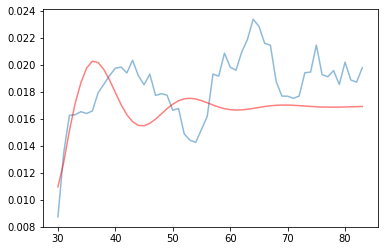

In [64]:
# 只用84个数据进行拟合，拟合并不是很理想
# 1）扩充数据规模，预处理，规整数据；2）神经网络方法，3）量子神经网络的方法
from pmdarima import auto_arima
stepwise_fit = auto_arima(X, trace=True, suppress_warnings=True)
# 得出结果 Best model:  ARIMA(1,0,3)(0,0,0)[0] intercept
#Total fit time: 4.207 seconds


# 训练ARIMA的数据集分割，训练集+测试集
print (X.shape)
trainSet_arima,testSet_arima = np.split(X,[30])
#testSet_arima = X.iiloc[-20:]
print(trainSet_arima.shape, testSet_arima.shape)

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(trainSet_arima,order=(4,0,0))
model=model.fit()
model.summary()

#检查how good of the model
start =len(trainSet_arima)
end = start + len(testSet_arima) - 1
pred = model.predict(start=start, end=end, typ = 'levels')
#pred.plot(legend = True)
#testSet_arima.plot(legend = True)
print(pred)
print(testSet_arima)

plt.plot(np.arange(30, 84), testSet_arima, label='Actual_value', alpha=0.5)
plt.plot(np.arange(30, 84), pred, c='r', label='Predicted_EWMA', alpha=0.5)

# Time Series

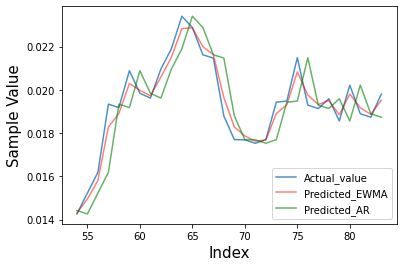

EWMA error:  1.6966556887467803 %
AUTO REG error:  5.107406069144584 %


In [41]:
## helper functions
## in both the functions t is the current value

def EWMA(X, t, x_t_hat=None, alpha=0.5): #,默认0.5,, 如果alpha->0, more weight to older data, if alpha->1, more weight to newer data
    if t == 0:    
        return alpha*X[t] * (1-alpha)*X[t]
    if x_t_hat:
        return alpha*X[t] + (1-alpha)*x_t_hat
    else:
        return alpha*X[t] + (1-alpha)*EWMA(X, t-1, None, alpha=alpha)

def seasonal_observed(X, t, season=144):
    return X[t-season+1]


class AutoRegression(object):
    def __init__(self, p=3, X=None):
        self.p = p
        self.X = X
        self.n = len(X)
        self.beta = np.ones((p, 1))/(p+1)
        self.LR_solver = LinearRegression(n_jobs=-1, fit_intercept=False)
        
    def get_features(self, start=0, end=-1):
        A = []
        for i in range(start, end-self.p):
            A.append(self.X[i:(i+self.p)])

        A = np.array(A)
        n = A.shape[0]
        A = np.hstack((np.ones((n,1)), A))
        return A
        
    def fit(self, end=-1): ## use 'end' inside, for our eg end = 577
        features = self.get_features(0, end)
        labels = np.array(self.X[self.p:end])
        self.LR_solver.fit(features, labels)
    
    def predict(self, t): ## t is the value we want to predict, same as the previous 'end' = 577
        features = self.get_features(t-self.p-1, t)
        return self.LR_solver.predict(features)

# 起点非24开始，加一个变量
delta = 30

def plotGraph(X,pred_ewma,pred_auto):
    plt.xlabel('Index', fontsize=15)
    plt.ylabel('Sample Value', fontsize=15)
    plt.plot(np.arange(24 + delta, 84), X, label='Actual_value', alpha=0.8)
    plt.plot(np.arange(24 + delta, 84), pred_ewma, c='r', label='Predicted_EWMA', alpha=0.5)
    plt.plot(np.arange(24 + delta, 84), pred_auto, c='g', label='Predicted_AR', alpha=0.6)

    plt.legend(fontsize=10)
    plt.show()

def errorCalc(actual,predict):
    return (np.abs(predict-actual)*100/actual).mean()
    
def calcTimeSeries(X):
    ar_model = AutoRegression(p=23 + delta, X=X)
    pred_auto = []
    for i in range(24 + delta, len(X)):
        ar_model.fit(end=i)
        pred_auto.append(ar_model.predict(t=i))

    pred_auto = np.array(pred_auto).squeeze()
    
    y_t_hat = X[23 + delta]
    alpha = 0.7
    pred_ewma = []

    for i in range(24 + delta, len(X)):
        y_t_hat = EWMA(X, i, y_t_hat, alpha)
        pred_ewma.append(y_t_hat)
    
    pred_ewma = np.array(pred_ewma)
#     print X[24]
#     print pred_auto
#     print pred_ewma
    y=[]
    for i in range(24 + delta,len(X)):
        y.append(X[i])
    X=y
    plotGraph(X,pred_ewma,pred_auto)
    print ("EWMA error: ",errorCalc(X,pred_ewma),"%")
    print ("AUTO REG error: ",errorCalc(X,pred_auto),"%")


calcTimeSeries(X)

In [33]:
print (X)

[0.01753654 0.01671724 0.01628377 0.01571072 0.01498057 0.01495185
 0.01394167 0.01502232 0.01649895 0.01657997 0.01664338 0.01745756
 0.01696358 0.0181543  0.01921209 0.0185627  0.0188185  0.01891544
 0.02145261 0.02142198 0.01988755 0.02009669 0.02083384 0.01824115
 0.01937279 0.01865439 0.01282313 0.00946815 0.00866318 0.00976388
 0.00873009 0.01345372 0.01627282 0.01631837 0.01653781 0.01640791
 0.01659396 0.01794766 0.01857603 0.01922389 0.01976533 0.01984754
 0.01941553 0.02035863 0.01922068 0.01853696 0.01932489 0.01774829
 0.01787929 0.01776996 0.0166457  0.01677423 0.01488547 0.0144224
 0.01426421 0.01522806 0.01618755 0.01933787 0.01917755 0.02088414
 0.019842   0.01961764 0.0209591  0.0218979  0.02340094 0.02287934
 0.02161878 0.02146912 0.01879018 0.01769925 0.01768853 0.01753083
 0.01769753 0.01942874 0.01948125 0.02148444 0.01929276 0.01913444
 0.0195879  0.01856301 0.02021539 0.01889404 0.01873533 0.0198003 ]
